In [1]:
!pip install min-dalle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 29.4 MB/s 
  Created wheel for min-dalle: filename=min_dalle-0.4.11-py3-none-any.whl size=10538 sha256=c1fc1cffcf92d66dd9b24e4c39bbba7d851bca6e80521570572896cfd91e69fa
  Stored in directory: /root/.cache/pip/wheels/99/f1/33/770cd6855504c51f1456d0dceae9ecc5a63ee9da6b799a63cf
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=d339a237fcb00201012fe698914506cc263d03c581e59a810659199e4c3af08c
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built min-dalle emoji


In [2]:
from IPython.display import display, update_display # We use this to display images
import torch
from min_dalle import MinDalle # Dall-E Mini library

In [8]:
model = MinDalle(
    dtype = torch.float16, # float16 is faster than float 32, though float 32 will generate better images
    device = 'cuda',
    is_mega = True, # Small model for faster inference, Mega for better results
    is_reusable = True
)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
initializing VQGanDetokenizer


In [9]:
# Parameters
text = "Beautiful librarian by Jeremy Mann, Rutkowski, Rey Artgerm, other Artstation illustrators, intricate details, portrait, face, closeup, headshot, mugshot, illustration, UHD, 4K"
progressive_outputs = True # This will keep generating and improving the images
seamless = True
grid_size = 3 # Generates 3x3 grid of images
temperature = 1
supercondition_factor = 32
top_k = 256

In [10]:
image_stream = model.generate_image_stream(
    text = text,
    seed = -1,
    grid_size = grid_size,
    progressive_outputs = progressive_outputs,
    is_seamless = seamless,
    temperature = temperature,
    top_k = int(top_k),
    supercondition_factor = supercondition_factor,
)

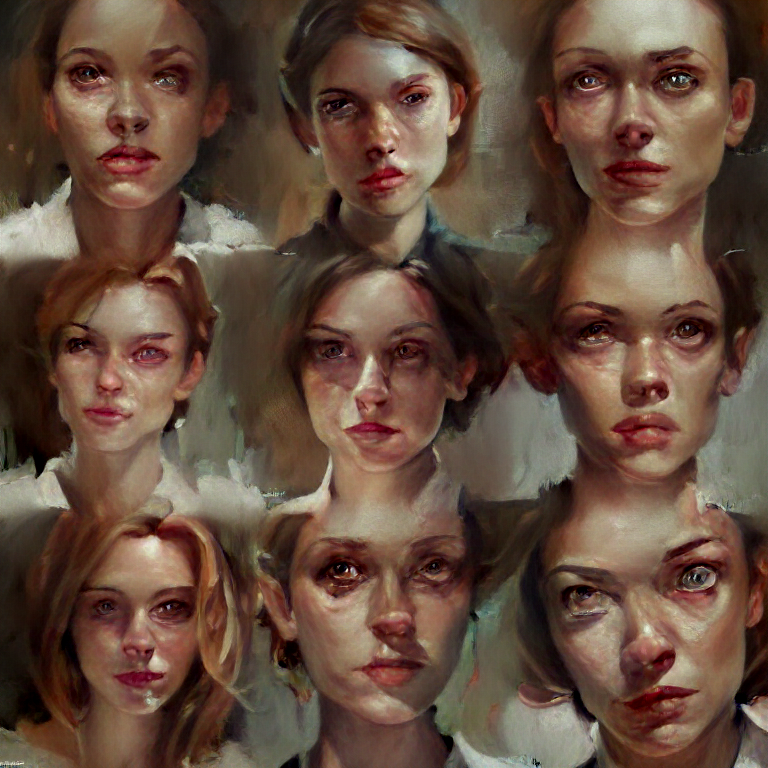

In [11]:
# Display the images
is_first = True
for image in image_stream:
  display_func = display if is_first else update_display # Displaying images if there's no output, otherwise refresh with new images
  display_func(image, display_id = 1)
  is_first = False # Subsequent iterations will use update_display

In [ ]:
# Setting is_mega to true can result in much more accurate images
# Playing around with the wording of the prompt can also result in better images, along with changing the parameters
# That's it, folks!